In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
netflix_data=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_data["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [5]:
netflix_data.shape

(8807, 12)

<AxesSubplot:>

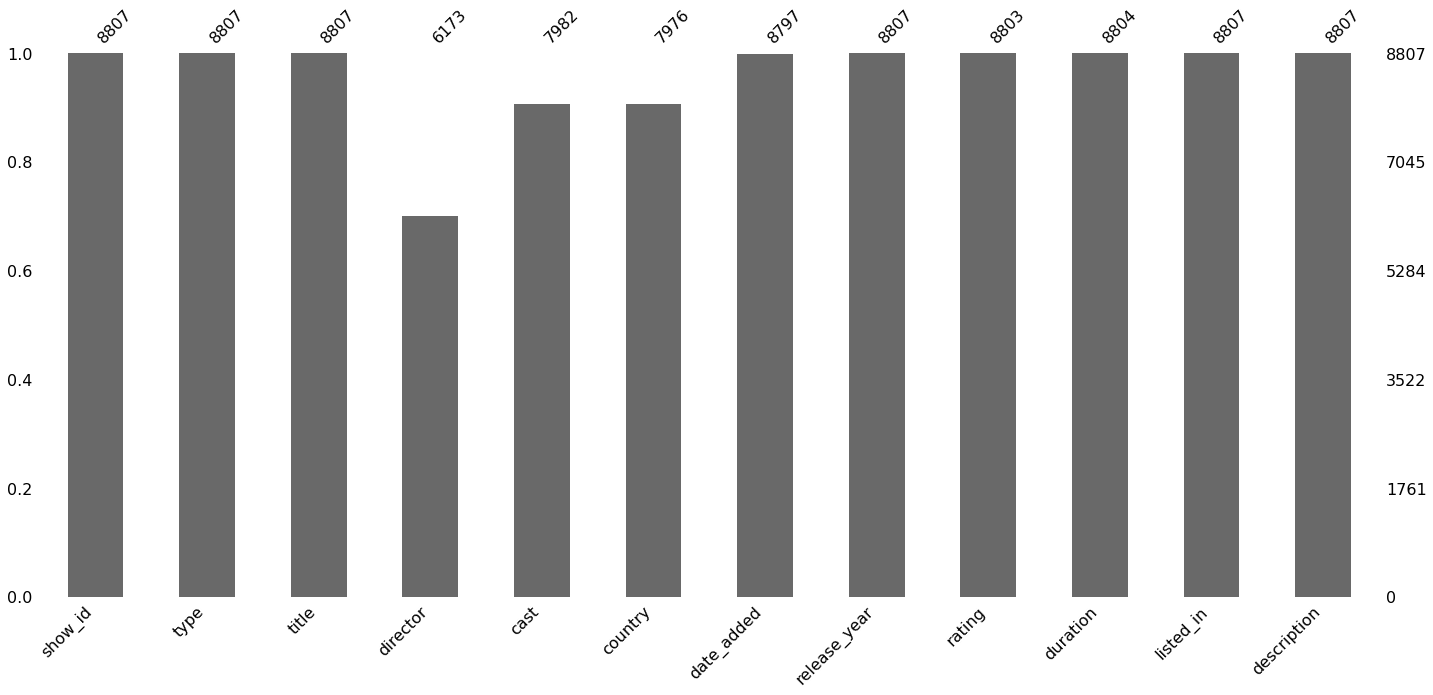

In [6]:
import missingno as msno
msno.bar(netflix_data)

In [7]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
recent_data=netflix_data[netflix_data["release_year"]>2000]

<AxesSubplot:xlabel='release_year', ylabel='count'>

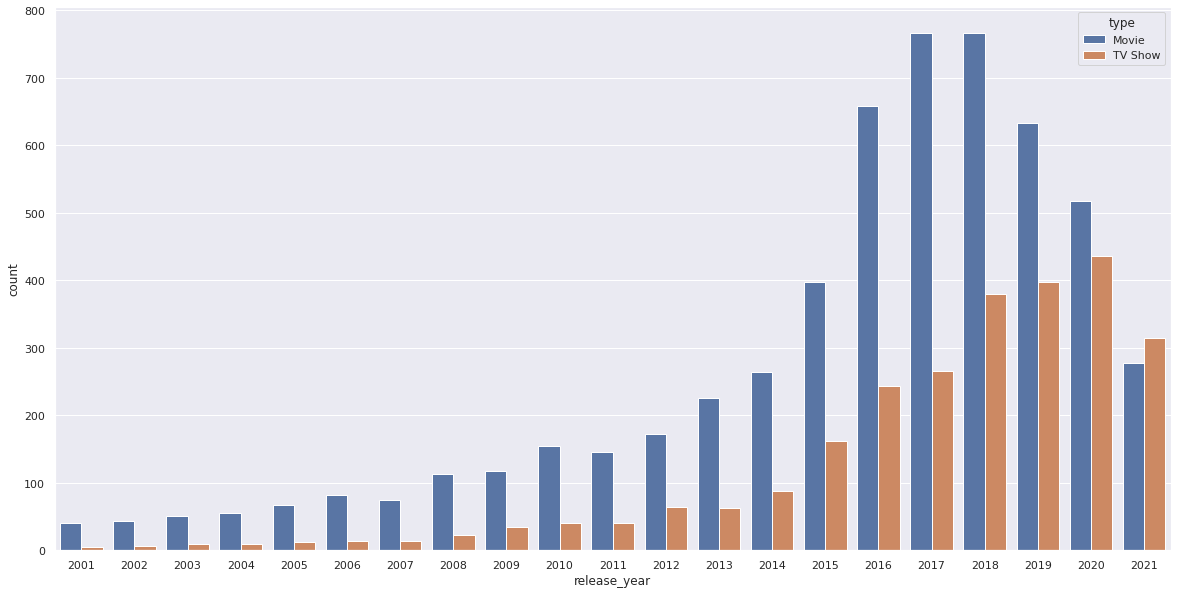

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=recent_data["release_year"],hue="type",data=recent_data)
  


In [10]:
#director column has minimal use and having no logical way to replace values
#hence getting droped
netflix_data=netflix_data.drop(columns="director")

In [11]:
netflix_data

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
netflix_data.groupby('rating').type.value_counts()

rating    type   
66 min    Movie         1
74 min    Movie         1
84 min    Movie         1
G         Movie        41
NC-17     Movie         3
NR        Movie        75
          TV Show       5
PG        Movie       287
PG-13     Movie       490
R         Movie       797
          TV Show       2
TV-14     Movie      1427
          TV Show     733
TV-G      Movie       126
          TV Show      94
TV-MA     Movie      2062
          TV Show    1145
TV-PG     Movie       540
          TV Show     323
TV-Y      TV Show     176
          Movie       131
TV-Y7     TV Show     195
          Movie       139
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         3
Name: type, dtype: int64

In [13]:
netflix_data.rating.value_counts() 
netflix_data.rating.fillna("TV-MA",inplace= True)

<AxesSubplot:xlabel='rating', ylabel='count'>

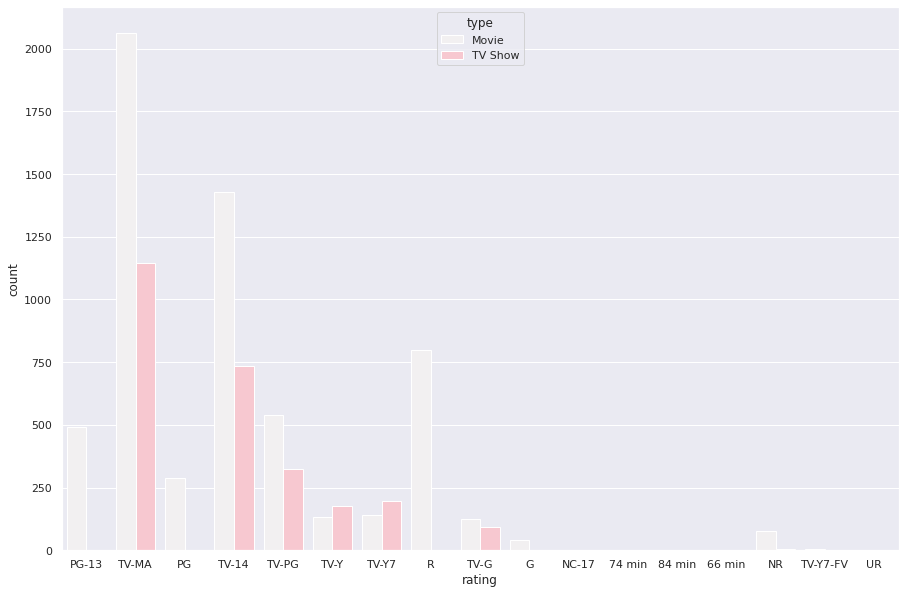

In [14]:
plt.figure(figsize=(15,10)) #Pltting the values obtained above
sns.countplot(x=netflix_data['rating'],hue=netflix_data['type'],color='Pink')

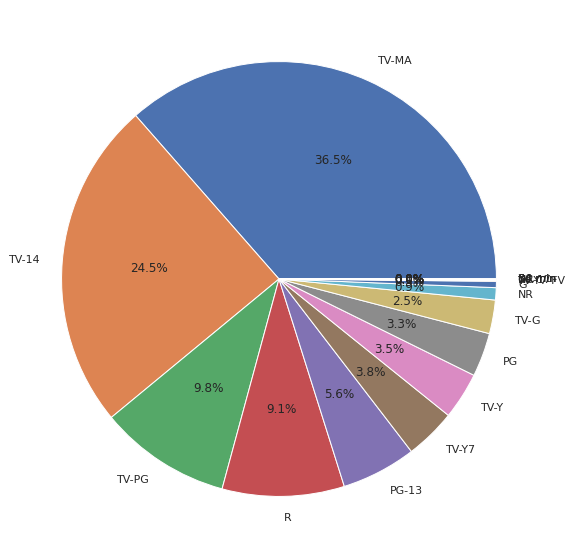

In [15]:
x= netflix_data.rating.value_counts()
plt.figure(figsize=(10,10),)
labels= list(x.index)
plt.pie(x.values,labels= labels,autopct= "%1.1f%%",)
plt.show()

In [16]:
netflix_data.country.value_counts()
netflix_data.country.fillna("India",inplace= True)

In [17]:
x=netflix_data['country'].value_counts().head(20)

Text(0.5, 0, 'Content in Countries')

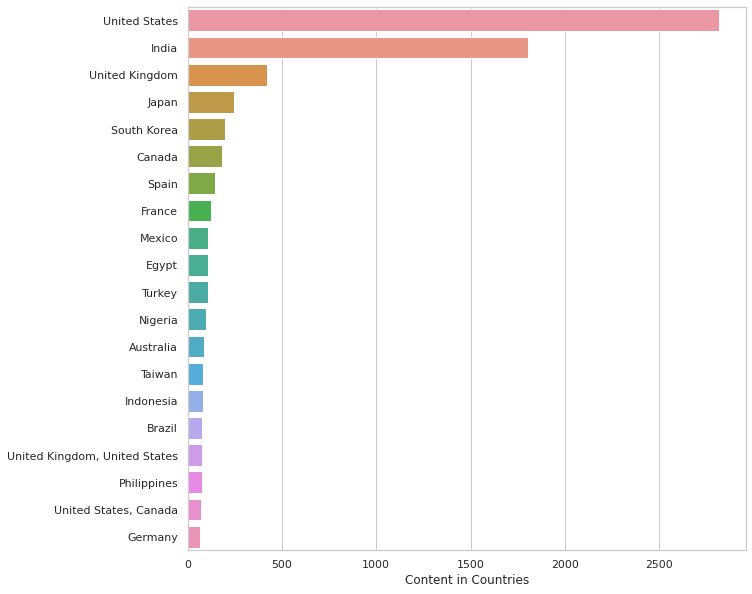

In [18]:
plt.figure(figsize=(10,10)) #Pltting the values obtained above
sns.set_style("whitegrid")
sns.barplot(x=x.values,y=x.index)
plt.xlabel("Content in Countries")


In [19]:
netflix_data

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",India,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,India,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,India,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [20]:
n=netflix_data["listed_in"].value_counts()
n

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
TV Action & Adventure, TV Comedies                            1
Children & Family Movies, Classic Movies                      1
TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows                 1
Dramas, Faith & Spirituality, Sports Movies                   1
Children & Family Movies, Comedies, Faith & Spirituality      1
Name: listed_in, Length: 514, dtype: int64

<AxesSubplot:xlabel='count', ylabel='listed_in'>

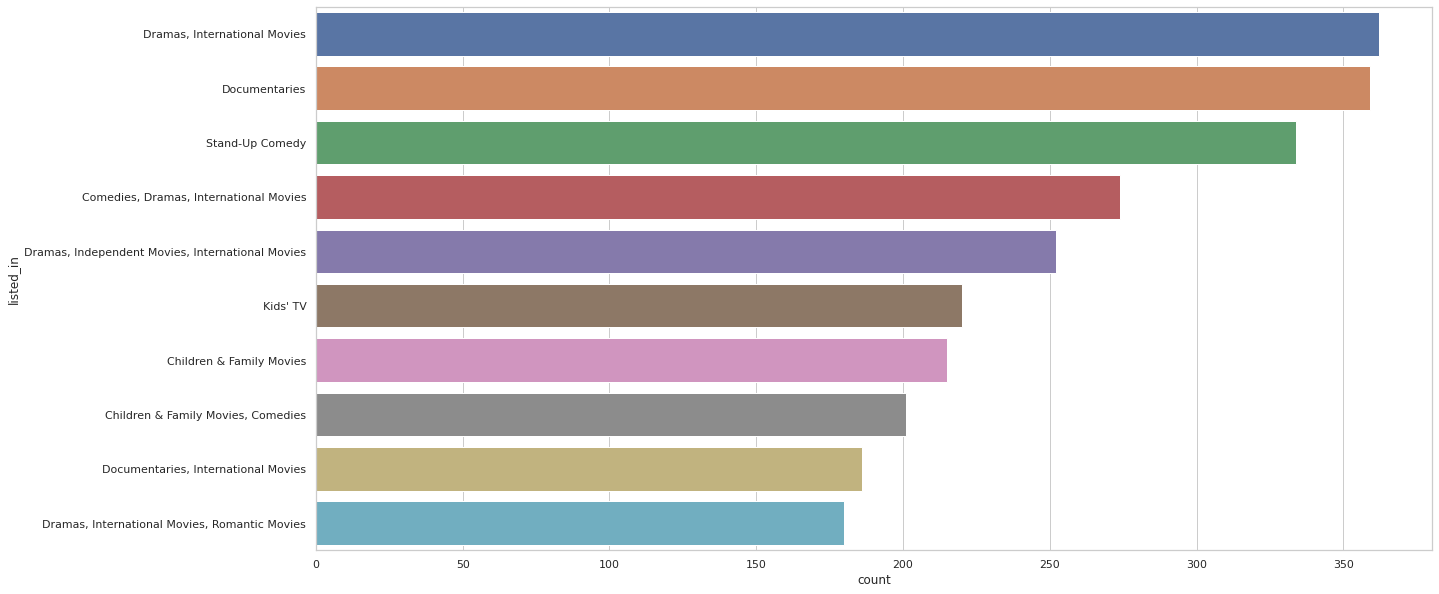

In [21]:
sns.countplot(y=netflix_data["listed_in"],order=n.index[:10])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Duration distribution of TV Shows on netflix (no. of seasons)')

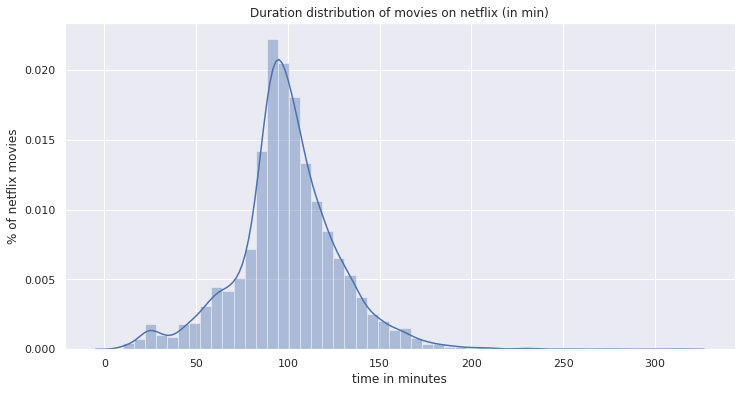

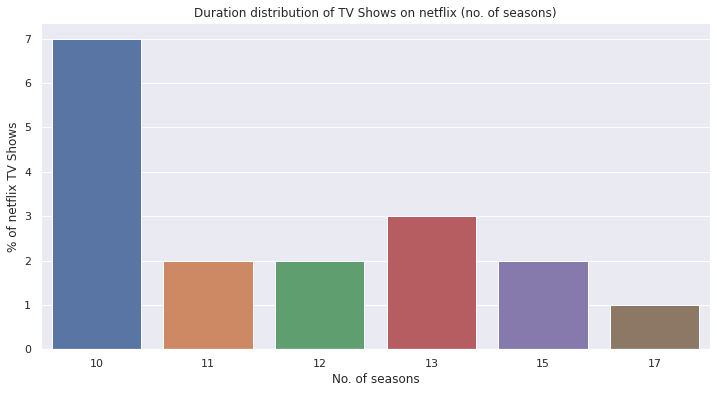

In [23]:
l = []
m = []
for i in netflix_data['duration']:
    if isinstance(i, str):
        if i[3:6] == 'min':
            l.append(int(i[0:2]))
        elif i[4:7] == 'min':
            l.append(int(i[0:3]))
        elif i[3:10] == 'Seasons':
            m.append(int(i[0:2]))

        
#Visualisation (duration of movies in minutes)     
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.distplot(l)
plt.xlabel('time in minutes')
plt.ylabel('% of netflix movies')
plt.title('Duration distribution of movies on netflix (in min)')

#Visualisation (number of seasons)
plt.figure(figsize=(12,6))
sns.countplot(m)
plt.xlabel('No. of seasons')
plt.ylabel('% of netflix TV Shows')
plt.title('Duration distribution of TV Shows on netflix (no. of seasons)')

<AxesSubplot:xlabel='Year', ylabel='Content Released over the years'>

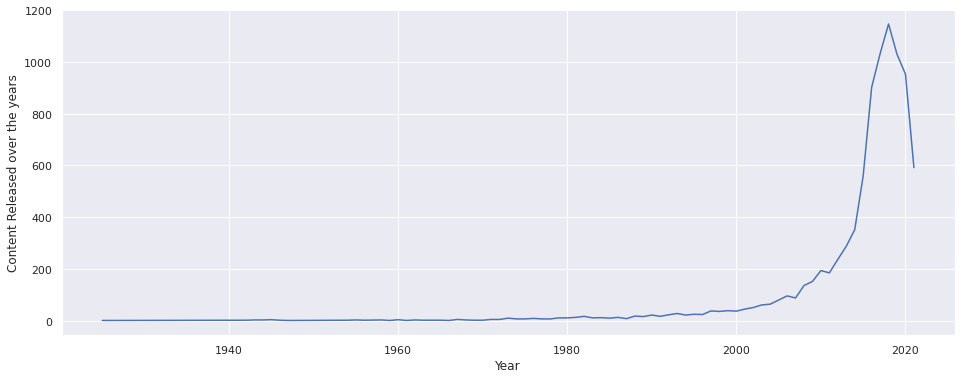

In [24]:
x= netflix_data.release_year.value_counts()
plt.figure(figsize=(16,6))
plt.xlabel("Year")
plt.ylabel("Content Released over the years")
sns.lineplot(x=x.index ,y= x.values)

In [25]:
tv = netflix_data[netflix_data['type'] == 'TV Show']
movie = netflix_data[netflix_data['type'] == 'Movie']

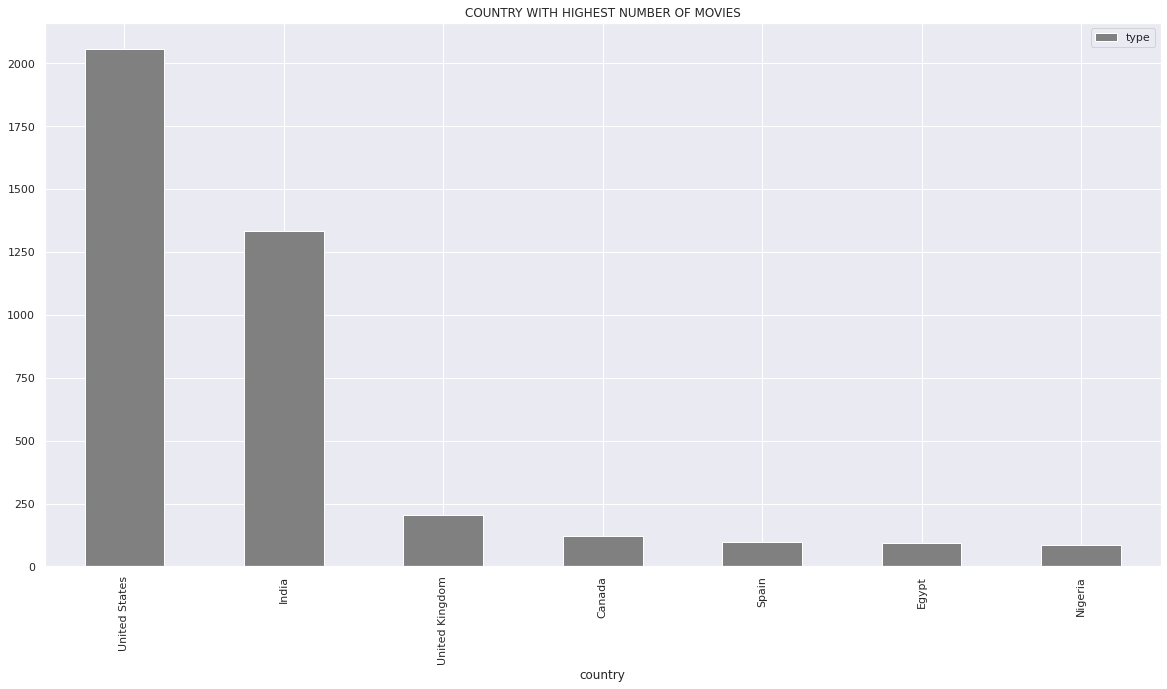

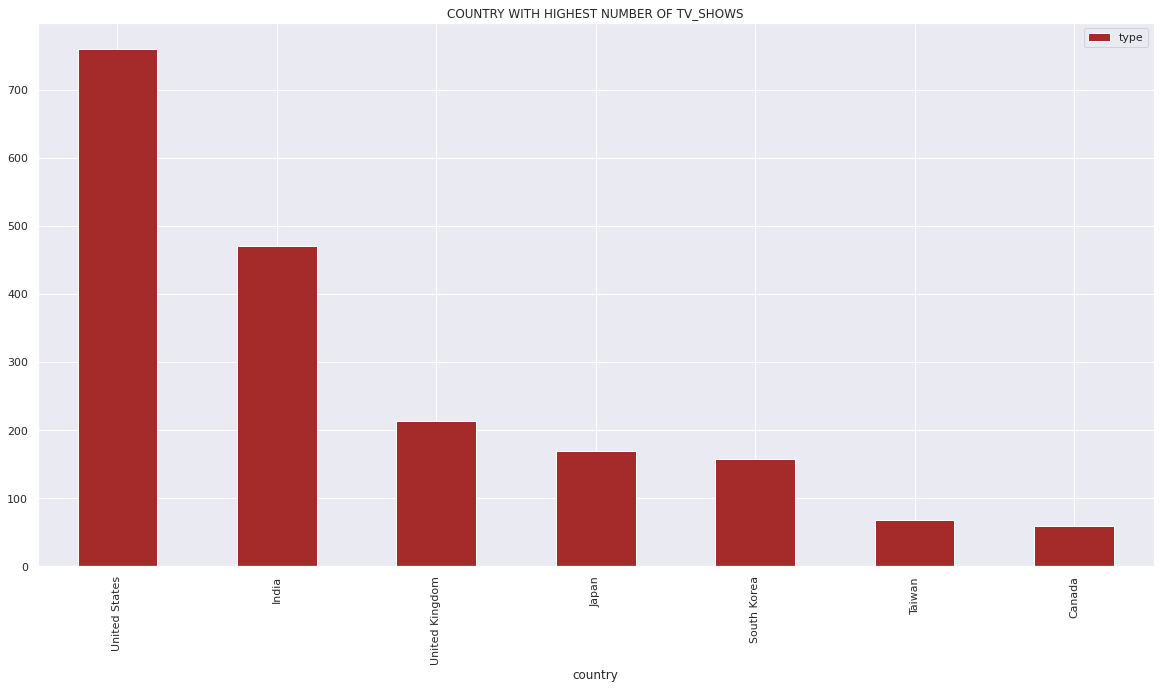

In [26]:

country_count = pd.crosstab(movie["country"],["type"]).sort_values(by = 'type',ascending=False )
country_count.head(7).plot(kind="bar",color ="grey")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF MOVIES")
plt.show()

country_count = pd.crosstab(tv["country"],["type"]).sort_values(by = 'type',ascending=False )
country_count.head(7).plot(kind="bar",color ="brown")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF TV_SHOWS")
plt.show()

Text(0.5, 1.0, 'DURATION OF TV')

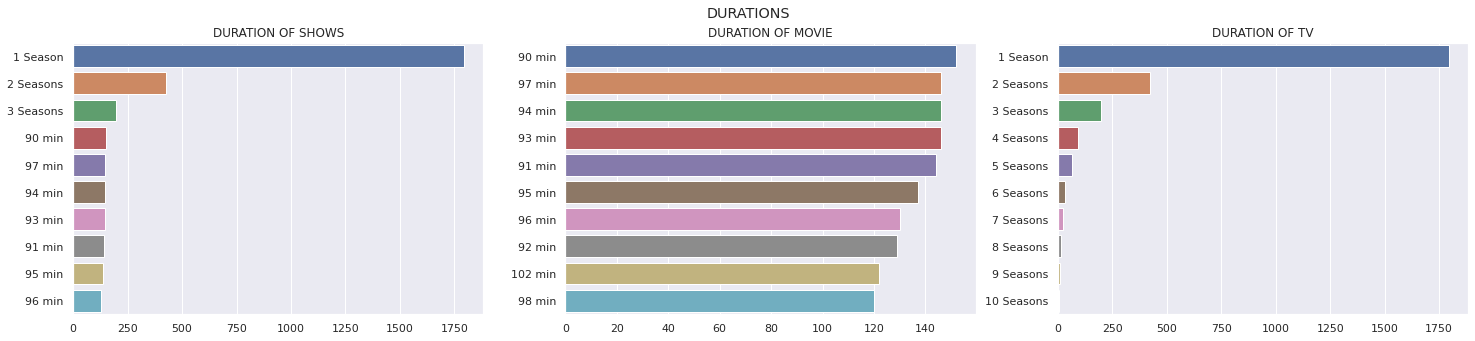

In [27]:
fig, axs = plt.subplots(1,3,figsize = (25,5))
fig.suptitle("DURATIONS")

gen_dur = netflix_data["duration"].value_counts().head(10)
sns.barplot(ax = axs[0], x = gen_dur.values, y = gen_dur.index)
axs[0].set_title('DURATION OF SHOWS')

movie_dur = movie["duration"].value_counts().head(10)
sns.barplot(ax = axs[1], x = movie_dur.values, y =  movie_dur.index)
axs[1].set_title('DURATION OF MOVIE')

tv_dur = tv["duration"].value_counts().head(10)
sns.barplot(ax = axs[2], x = tv_dur.values, y = tv_dur.index)
axs[2].set_title('DURATION OF TV')

In [ ]:
netflix_data